In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

font={'family':'serif',
      # 'style':'italic',  # 斜体
      'weight':'normal',
      # 'color':'red',
      'size': 18
}  
def setfigform_simple(xlabel, ylabel=None, xlimit = (None,None), ylimit = (None, None), xticks=None):
    # plt.legend(fontsize = 16, frameon=False),
    plt.xlabel(xlabel, fontdict = font)
    plt.ylabel(ylabel, fontdict = font)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    if xticks is None:
        plt.xticks(fontsize = font['size'], fontname = "serif")
    else:
        plt.xticks(xticks, fontsize = font['size'], fontname = "serif")
    plt.yticks(fontsize = font['size'], fontname = "serif")
    plt.tick_params(direction="in")
    
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

In [40]:
# Time embedding
fes_magn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch100_sample1/FES-magn-MC.dat", skiprows=1).T
fes_magn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch100_sample1/FES-magn.dat", skiprows=1).T
# Time embedding
fes_magn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch106_sample1/FES-magn.dat", skiprows=1).T
fes_magn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline/epoch100_sample1/FES-magn.dat", skiprows=1).T


In [41]:
err_fes_magn_gc = fes_magn_gc[1]-fes_magn_ref[1]
print(err_fes_magn_gc)
mse_fes_magn_gc = np.sum((fes_magn_gc[1]-fes_magn_ref[1])**2)/fes_magn_gc.shape[1]
print(mse_fes_magn_gc)

err_fes_magn_g = fes_magn_g[1]-fes_magn_ref[1]
print(err_fes_magn_g)
mse_fes_magn_g = np.sum((fes_magn_g[1]-fes_magn_ref[1])**2)/fes_magn_g.shape[1]
print(mse_fes_magn_g)

err_fes_magn_d = fes_magn_d[1]-fes_magn_ref[1]
print(err_fes_magn_d)
mse_fes_magn_d = np.sum((fes_magn_d[1]-fes_magn_ref[1])**2)/fes_magn_d.shape[1]
print(mse_fes_magn_d)

[ 0.691028  0.286334  0.41901   0.309665  0.225343  0.049074 -0.067433
 -0.167114 -0.251464 -0.292379 -0.271748 -0.155943 -0.019189  0.071704
  0.185729  0.18747   0.452585]
0.08491168328635301
[ 2.038801  1.239403  0.778334  0.303627  0.088597 -0.057697 -0.258007
 -0.339462 -0.401494 -0.435736 -0.464762 -0.321174 -0.161453  0.123534
  0.536837  1.007812  1.874459]
0.7125191718833532
[ 0.586462  0.265462  0.033     0.103064 -0.026072 -0.092131 -0.108853
 -0.110665 -0.144281 -0.096553 -0.131552 -0.091024  0.085684  0.09675
  0.263751  0.255016  0.520769]
0.05515374854041194


(2, 17)


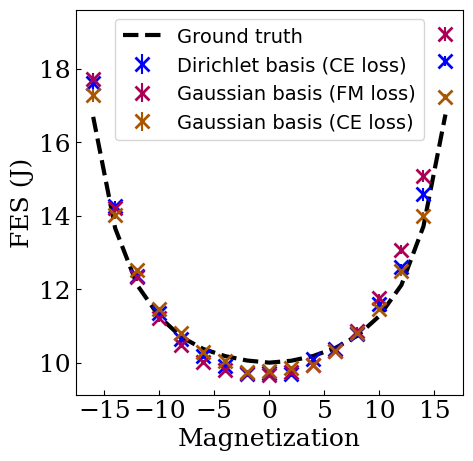

In [4]:
print(fes_magn_ref.shape)
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_magn_d[0], fes_magn_d[1], yerr=fes_magn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_magn_g[0], fes_magn_g[1], yerr=fes_magn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_magn_gc[0], fes_magn_gc[1], yerr=fes_magn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_magn_ref[0], fes_magn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=3)
plt.legend(fontsize=font["size"]-4)
setfigform_simple("Magnetization", "FES (J)")


In [42]:
# Time embedding
fes_sqrmagn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0_b50w/kernel3x3_timeembed/val_baseline/epoch101_sample1/FES-sqrmagn-MC.dat", skiprows=1).T
fes_sqrmagn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0_b50w/kernel3x3_timeembed/val_baseline/epoch101_sample1/FES-sqrmagn.dat", skiprows=1).T
# Time embedding
fes_sqrmagn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0_b50w/kernel3x3_timeembed/val_baseline/epoch101_sample1/FES-sqrmagn.dat", skiprows=1).T
fes_sqrmagn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0_b50w/kernel3x3_celoss_timeembed/val_baseline/epoch101_sample1/FES-sqrmagn.dat", skiprows=1).T


In [43]:

err_fes_sqrmagn_gc = fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_gc)
mse_fes_sqrmagn_gc = np.sum((fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_gc/(16*16))

err_fes_sqrmagn_g = fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_g)
mse_fes_sqrmagn_g = np.sum((fes_sqrmagn_g[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_g.shape[1]
print(mse_fes_sqrmagn_g/(16*16))

err_fes_sqrmagn_d = fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_d)
mse_fes_sqrmagn_d = np.sum((fes_sqrmagn_d[1]-fes_sqrmagn_ref[1])**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_d/(16*16))

[ 5.233955  9.611502  5.544156  0.4356   -2.243315 -3.75361  -3.601267
 -2.86293 ]
0.09325693904388642
[-2.596915 -3.604356 -7.010445 -8.141675 -7.555415 -7.073618 -5.082643
 -3.46467 ]
0.13678033501079548
[-0.037876  0.909183 -2.476061 -4.840308 -5.37796  -5.636636 -4.391383
 -3.171448]
0.058800758865692894


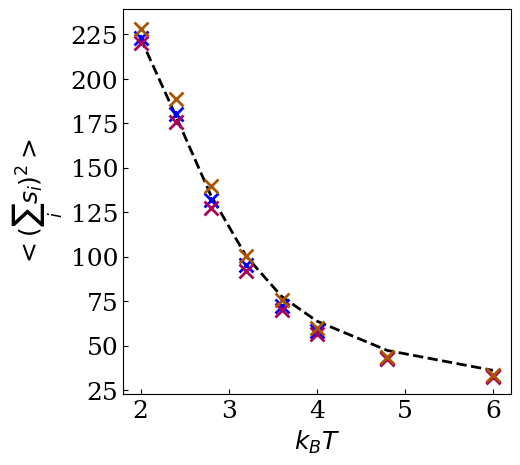

In [7]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_sqrmagn_d[0], fes_sqrmagn_d[1], yerr=fes_sqrmagn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_sqrmagn_g[0], fes_sqrmagn_g[1], yerr=fes_sqrmagn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_sqrmagn_gc[0], fes_sqrmagn_gc[1], yerr=fes_sqrmagn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_sqrmagn_ref[0], fes_sqrmagn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=2)
# plt.legend(fontsize=font["size"]-4)
setfigform_simple("$k_BT$", "$<(\sum_i s_i)^2>$", xticks=np.arange(2.0, 6.4, 1.0))

In [36]:
# Time embedding
fes_ssf_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch100_sample1/FES-ssf-MC.dat", skiprows=1).T
fes_ssf_d = np.loadtxt("logs-dir-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch100_sample1/FES-ssf.dat", skiprows=1).T
# Time embedding
fes_ssf_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_timeembed/val_baseline/epoch106_sample1/FES-ssf.dat", skiprows=1).T
fes_ssf_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0/kernel3x3_celoss_timeembed/val_baseline/epoch100_sample1/FES-ssf.dat", skiprows=1).T


In [37]:
print(fes_ssf_gc[0])
err_fes_ssf_gc = fes_ssf_gc[1]-fes_ssf_ref[1]
print(err_fes_ssf_gc)
mse_fes_ssf_gc = np.sum((fes_ssf_gc[1]-fes_ssf_ref[1])**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_gc)

print(fes_ssf_g[0])
err_fes_ssf_g = fes_ssf_g[1]-fes_ssf_ref[1]
print(err_fes_ssf_g)
mse_fes_ssf_g = np.sum((fes_ssf_g[1]-fes_ssf_ref[1])**2)/fes_ssf_g.shape[1]
print(mse_fes_ssf_g)

print(fes_ssf_d[0])
err_fes_ssf_d = fes_ssf_d[1]-fes_ssf_ref[1]
print(err_fes_ssf_d)
mse_fes_ssf_d = np.sum((fes_ssf_d[1]-fes_ssf_ref[1])**2)/fes_ssf_d.shape[1]
print(mse_fes_ssf_d)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.013833 -0.006875  0.015838  0.012894  0.000402 -0.007992 -0.013716
 -0.011107]
0.00012890534587500023
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.034168 -0.087977 -0.073174 -0.060934 -0.049295 -0.03947  -0.0235
 -0.015588]
0.0028447381317499984
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[-0.010029  0.000632  0.026757  0.022759  0.007467 -0.002978 -0.011135
 -0.009368]
0.00020140770212500003


In [10]:
idx_order_ref = np.argsort(fes_ssf_ref[0])

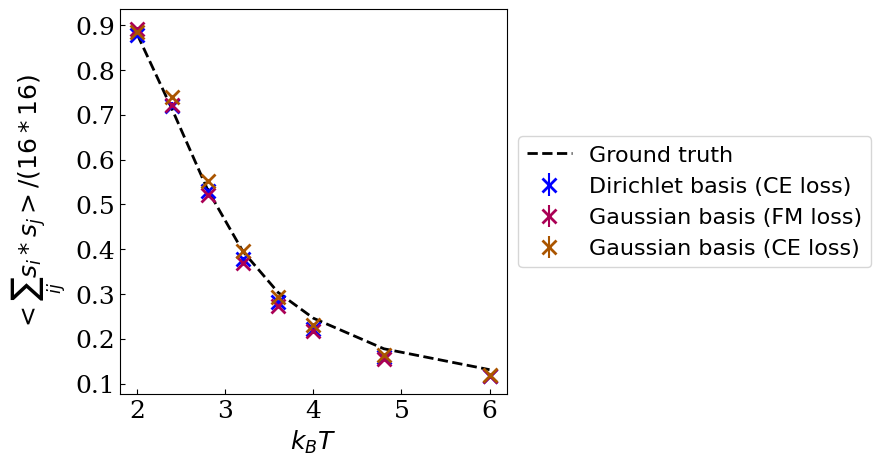

In [11]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(16*16)$", xticks=np.arange(2.0, 6.4, 1.0))

# 6x6 lattice

In [25]:
# Time embedding
fes_magn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-magn-MC.dat", skiprows=1).T
fes_magn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-magn.dat", skiprows=1).T

# Time embedding
fes_magn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-magn.dat", skiprows=1).T
fes_magn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0_b5w/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-magn.dat", skiprows=1).T


In [26]:
print(fes_magn_d[0])
print(fes_magn_ref[0])

err_fes_magn_gc = fes_magn_gc[1]-fes_magn_ref[1]
print(err_fes_magn_gc)
mse_fes_magn_gc = np.sum(((fes_magn_gc[1]-fes_magn_ref[1]))**2)/fes_magn_gc.shape[1]
print(mse_fes_magn_gc)

err_fes_magn_g = fes_magn_g[1]-fes_magn_ref[1]
print(err_fes_magn_g)
mse_fes_magn_g = np.sum(((fes_magn_g[1]-fes_magn_ref[1]))**2)/fes_magn_g.shape[1]
print(mse_fes_magn_g)

err_fes_magn_d = fes_magn_d[1]-fes_magn_ref[1]
print(err_fes_magn_d)
mse_fes_magn_d = np.sum(((fes_magn_d[1]-fes_magn_ref[1]))**2)/fes_magn_d.shape[1]
print(mse_fes_magn_d)

[-36. -34. -32. -30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.
  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.
  20.  22.  24.  26.  28.  30.  32.  34.  36.]
[-36. -34. -32. -30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.
  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.
  20.  22.  24.  26.  28.  30.  32.  34.  36.]
[ 4.41392   1.10229  -0.051927 -0.444946 -0.946952 -0.843858 -0.739331
 -0.727749 -0.682377 -0.485231 -0.310919 -0.203323 -0.161594 -0.012934
  0.172321  0.145344  0.200186  0.234486  0.299704  0.291819  0.287042
  0.2343    0.284152  0.1216   -0.053845 -0.035895 -0.283812 -0.424747
 -0.347739 -0.325505 -0.25692  -0.275417 -0.156182  0.535338  1.557487
  4.192305  3.921059]
1.65738541658492
[ 4.413920e+00  3.315831e+00  2.228131e+00  1.889164e+00  1.606404e+00
  1.183481e+00  1.307740e+00  1.074491e+00  6.847620e-01  7.185540e-01
  7.279950e-01  5.548110e-01  2.752030e-01  3.738700e-01  4.231260e-01
  1.869840e-01 

(2, 37)


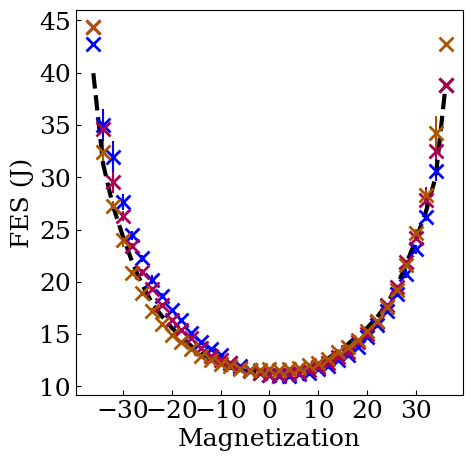

In [27]:
print(fes_magn_ref.shape)
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_magn_d[0], fes_magn_d[1], yerr=fes_magn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_magn_g[0], fes_magn_g[1], yerr=fes_magn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_magn_gc[0], fes_magn_gc[1], yerr=fes_magn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_magn_ref[0], fes_magn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=3)
# plt.legend(fontsize=font["size"]-4)
setfigform_simple("Magnetization", "FES (J)")


In [28]:
# Time embedding
fes_sqrmagn_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-sqrmagn-MC.dat", skiprows=1).T
fes_sqrmagn_d = np.loadtxt("logs-dir-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-sqrmagn.dat", skiprows=1).T

# Time embedding
fes_sqrmagn_g = np.loadtxt("logs-gaussian-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-sqrmagn.dat", skiprows=1).T
fes_sqrmagn_gc = np.loadtxt("logs-gaussian-ising/latt4x4T4.0_b5w/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-sqrmagn.dat", skiprows=1).T

In [29]:
print(fes_sqrmagn_d[0])
print(fes_sqrmagn_ref[0])

err_fes_sqrmagn_gc = fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_gc)
mse_fes_sqrmagn_gc = np.sum(((fes_sqrmagn_gc[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_gc.shape[1]
print(mse_fes_sqrmagn_gc/(36*36))

err_fes_sqrmagn_g = fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_g)
mse_fes_sqrmagn_g = np.sum(((fes_sqrmagn_g[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_g.shape[1]
print(mse_fes_sqrmagn_g/(36*36))

err_fes_sqrmagn_d = fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]
print(err_fes_sqrmagn_d)
mse_fes_sqrmagn_d = np.sum(((fes_sqrmagn_d[1]-fes_sqrmagn_ref[1]))**2)/fes_sqrmagn_d.shape[1]
print(mse_fes_sqrmagn_d/(36*36))

[2.  2.4 2.8 3.2 3.6 4.  4.8 6. ]
[2.  2.4 2.8 3.2 3.6 4.  4.8 6. ]
[-4.58651720e+01  5.33122440e+01  1.00683059e+02  5.17890070e+01
  2.47393710e+01  1.07118520e+01 -5.45390000e-02 -3.27727100e+00]
1.7845787720875923
[32.345948 99.780606 71.285731 12.366676 -2.037657 -6.64966  -8.698232
 -7.634775]
1.5836553683093149
[ 2.30483350e+01  1.35640111e+02  1.08857579e+02  2.39246370e+01
  5.63010000e-02 -6.97296300e+00 -9.66791900e+00 -8.39611300e+00]
3.044407308428711


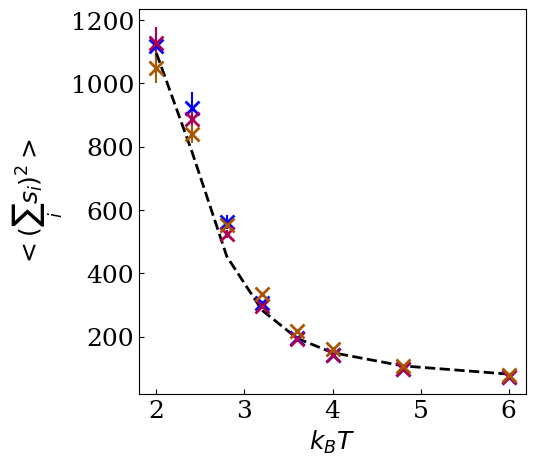

In [30]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_sqrmagn_d[0], fes_sqrmagn_d[1], yerr=fes_sqrmagn_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_sqrmagn_g[0], fes_sqrmagn_g[1], yerr=fes_sqrmagn_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_sqrmagn_gc[0], fes_sqrmagn_gc[1], yerr=fes_sqrmagn_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_sqrmagn_ref[0], fes_sqrmagn_ref[1], label="Ground truth", c="k", linestyle="--", linewidth=2)
# plt.legend(fontsize=font["size"]-4)
setfigform_simple("$k_BT$", "$<(\sum_i s_i)^2>$", xticks=np.arange(2.0, 6.4, 1.0))

In [31]:
# Time embedding
fes_ssf_ref = np.loadtxt("logs-dir-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-ssf-MC.dat", skiprows=1).T
fes_ssf_d = np.loadtxt(f"logs-dir-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-ssf-B{65536*2}.dat", skiprows=1).T
# Time embedding
fes_ssf_g = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0_b5w/kernel3x3_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-ssf{65536*2}.dat", skiprows=1).T
fes_ssf_gc = np.loadtxt(f"logs-gaussian-ising/latt4x4T4.0_b5w/kernel3x3_celoss_timeembed/val_baseline_latt6x6/epoch101_sample1/FES-ssf{65536*2}.dat", skiprows=1).T


In [32]:
print(fes_ssf_d[0])
print(fes_ssf_ref[0])

err_fes_ssf_gc = fes_ssf_gc[1]-fes_ssf_ref[1]
print(err_fes_ssf_gc)
mse_fes_ssf_gc = np.sum(((fes_ssf_gc[1]-fes_ssf_ref[1]))**2)/fes_ssf_gc.shape[1]
print(mse_fes_ssf_gc)

err_fes_ssf_g = fes_ssf_g[1]-fes_ssf_ref[1]
print(err_fes_ssf_g)
mse_fes_ssf_g = np.sum(((fes_ssf_g[1]-fes_ssf_ref[1]))**2)/fes_ssf_g.shape[1]
print(mse_fes_ssf_g)

err_fes_ssf_d = fes_ssf_d[1]-fes_ssf_ref[1]
print(err_fes_ssf_d)
mse_fes_ssf_d = np.sum(((fes_ssf_d[1]-fes_ssf_ref[1]))**2)/fes_ssf_d.shape[1]
print(mse_fes_ssf_d)

[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[4.  2.  2.4 2.8 3.2 3.6 4.8 6. ]
[ 0.009634 -0.278296 -0.140782 -0.018633  0.007661  0.010856  0.002024
 -0.000713]
0.012236173298374998
[-0.004707 -0.264521 -0.13849  -0.036142 -0.014845 -0.007869 -0.0062
 -0.005197]
0.011353372943625
[-0.005482 -0.257319 -0.131447 -0.034907 -0.01633  -0.009396 -0.00654
 -0.00515 ]
0.010645522544875


In [33]:
idx_order_ref = np.argsort(fes_ssf_ref[0])

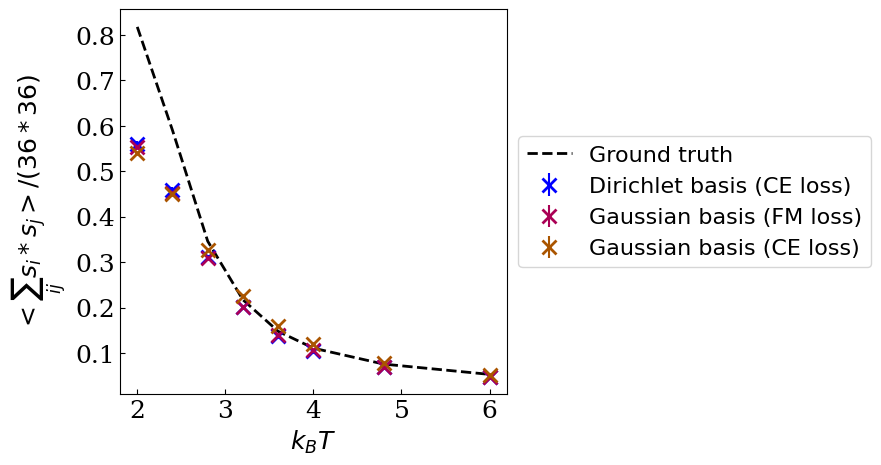

In [34]:
plt.rcParams["figure.figsize"]=(5,5)
line_color = [plt.colormaps["brg"](float(i)/float(3)) for i in range(3)]

plt.errorbar(fes_ssf_d[0], fes_ssf_d[1], yerr=fes_ssf_d[2], label="Dirichlet basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[0])
plt.errorbar(fes_ssf_g[0], fes_ssf_g[1], yerr=fes_ssf_g[2], label="Gaussian basis (FM loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[1])
plt.errorbar(fes_ssf_gc[0], fes_ssf_gc[1], yerr=fes_ssf_gc[2], label="Gaussian basis (CE loss)", marker="x", linestyle="", markersize=10, markeredgewidth=2, c=line_color[2])

plt.plot(fes_ssf_ref[0][idx_order_ref], fes_ssf_ref[1][idx_order_ref], label="Ground truth", c="k", linestyle="--", linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font["size"]-2)
setfigform_simple("$k_BT$", "$<\sum_{ij} s_i*s_j>/(36*36)$", xticks=np.arange(2.0, 6.4, 1.0))